In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


# PCA

In [2]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenValues \n', eigen_vals)
print('\nEigenVectors \n', eigen_vecs)


EigenValues 
 [4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]

EigenVectors 
 [[-0.14119433 -0.46732089  0.18497972 -0.06135175 -0.25730345 -0.35704654
  -0.12129238 -0.35842237  0.00627487 -0.12888373  0.26913886 -0.45815942
  -0.29636449]
 [ 0.24946815 -0.26876924 -0.11558438  0.50736306 -0.04631822 -0.44728114
   0.50008396 -0.01883529 -0.12812954  0.06731754 -0.25722819  0.22011017
  -0.08089203]
 [-0.05104853 -0.27660192 -0.62580603 -0.23358668 -0.07939612 -0.18115394
  -0.12514686  0.24258145  0.20791123 -0.12011171  0.36451474  0.40582112
  -0.07645806]
 [ 0.19890851  0.01955098 -0.63022498  0.06619111  0.14036996  0.06552435
  -0.28824897 -0.49700581 -0.1131201  -0.0232868  -0.30770306 -0.27644343
   0.14123878]
 [-0.1444494  -0.32120489 -0.06808315 -0.21808618  0.75131283  0.09253292
   0.41586303  0.06557898 -0.01561131  0.01819235  0.09054263 -0.25269866
   0.02931993]
 [-0.4047

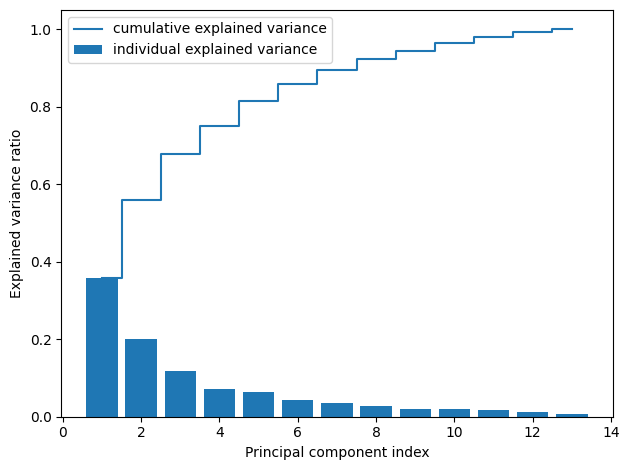

In [4]:
import matplotlib.pyplot as plt

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Feature Transformation**

In [5]:
eigen_pair = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pair.sort(reverse=True)
w = np.hstack((eigen_pair[0][1][:, np.newaxis], eigen_pair[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.14119433 -0.46732089]
 [ 0.24946815 -0.26876924]
 [-0.05104853 -0.27660192]
 [ 0.19890851  0.01955098]
 [-0.1444494  -0.32120489]
 [-0.40472564 -0.04839313]
 [-0.42654202  0.00936768]
 [ 0.29573373 -0.00146817]
 [-0.32620144 -0.04087554]
 [ 0.07420694 -0.53982087]
 [-0.29277478  0.27536907]
 [-0.37482201  0.19149315]
 [-0.2889145  -0.34828709]]


In [6]:
X_train_std[0].dot(w)

array([-3.85641154, -2.66984554])

In [7]:
X_train_pca = X_train_std.dot(w)

In [8]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


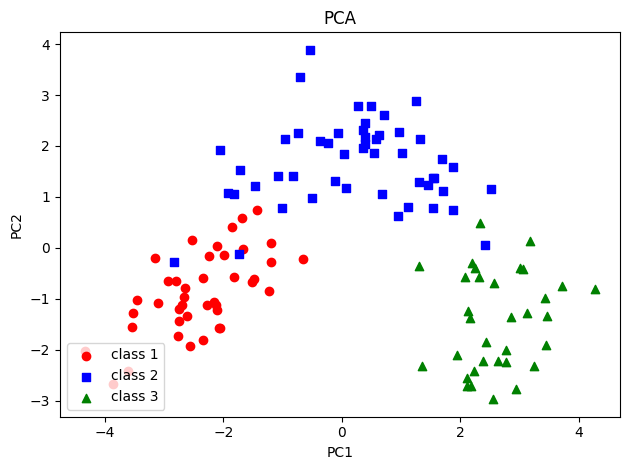

In [9]:
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train ==l, 0], X_train_pca[y_train ==l, 1], c=c, label=f'class {l}', marker=m)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  #setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  #X_scaled = sc.transform(np.array([xx1.ravel(), xx2.ravel()]).T)
  #lab = classifier.predict(X_scaled)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'class {cl}',
                edgecolor='black')

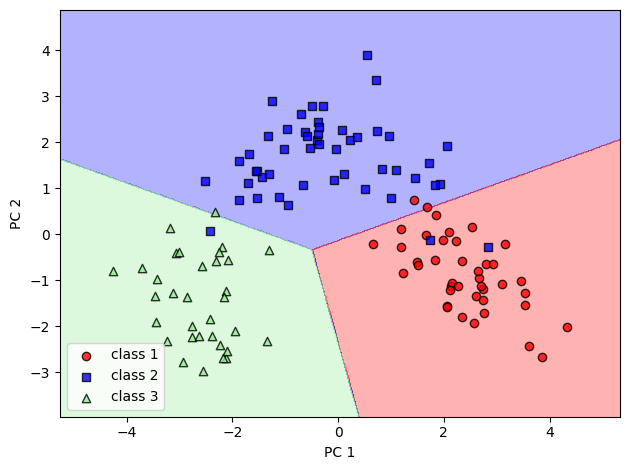

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

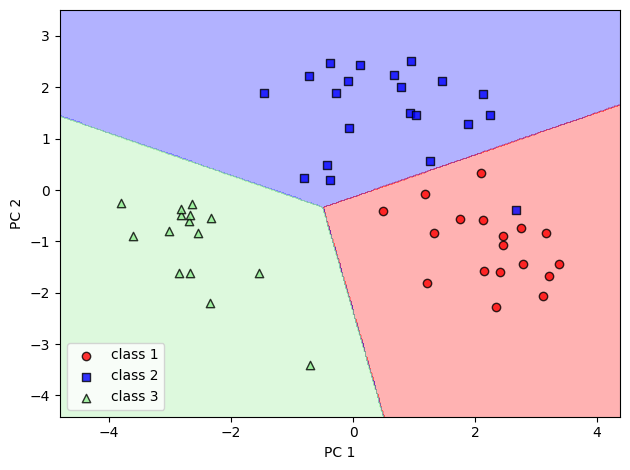

In [12]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [13]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.35935182, 0.20113893, 0.11882529, 0.07128404, 0.0649561 ,
       0.04356648, 0.03545179, 0.02881555, 0.02103776, 0.02007144,
       0.01614956, 0.01140877, 0.00794247])

In [14]:
columns = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine = df_wine.rename(columns=dict(zip(range(1,14), columns)))

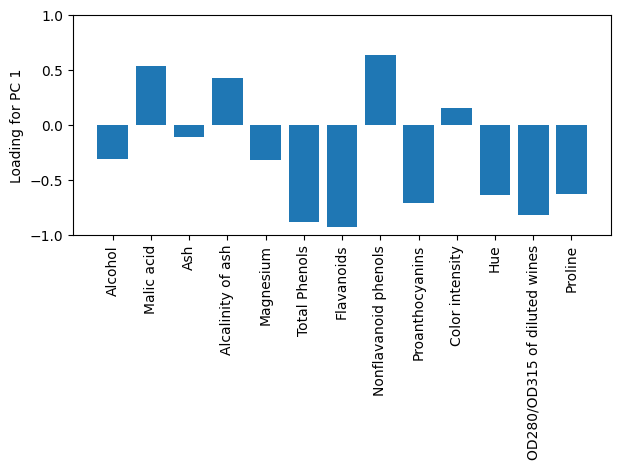

In [15]:
loadings = eigen_vecs * np.sqrt(eigen_vals)

fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loading for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

In [16]:
#using sklearn
#sklearn can either give negative or positive loading values for loading. So, no need to worry about that
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_) * -1

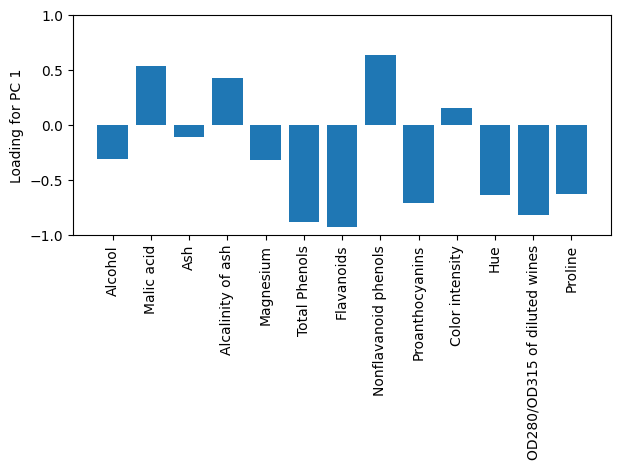

In [17]:
fig, ax = plt.subplots()
ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loading for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()

# Linear Discriminant Analysis

In [21]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
  mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
  print(f'MV {label}: {mean_vecs[label - 1]}\n')

MV 1: [ 0.8998 -0.36    0.301  -0.743   0.4679  0.9176  0.9809 -0.6287  0.6403
  0.2018  0.4958  0.7642  1.1697]

MV 2: [-0.9191 -0.3613 -0.367   0.2926 -0.4362 -0.1187  0.0098  0.1098 -0.0235
 -0.8556  0.372   0.2343 -0.7699]

MV 3: [ 0.2748  0.9947  0.1821  0.4798  0.0796 -0.9602 -1.2334  0.6148 -0.7599
  1.0456 -1.1796 -1.3044 -0.2868]



In [23]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
  class_scatter = np.zeros((d, d))
  for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
  S_W += class_scatter
print('Within-class scatter matrix: ' f'{S_W.shape[0]}x{S_W.shape[1]}')

Within-class scatter matrix: 13x13


In [24]:
print('Class label distribution: ', np.bincount(y_train)[1:])

Class label distribution:  [41 50 33]


In [26]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
  class_scatter = np.cov(X_train_std[y_train == label].T)
  S_W += class_scatter
print('Scaled within-class scatter matrix: ' f'{S_W.shape[0]}x{S_W.shape[1]}')


Scaled within-class scatter matrix: 13x13


In [28]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)

d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
  n = X_train_std[y_train == i+1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1)
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: ' f'{S_B.shape[0]}x{S_B.shape[1]}')

Between-class scatter matrix: 13x13


In [29]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
  print(eigen_val[0])

Eigenvalues in decreasing order:

396.21161595354454
183.91418094236477
5.497127946628612e-14
3.31796763888955e-14
1.8876266371979882e-14
1.5355727626652353e-14
1.5355727626652353e-14
1.515198871689145e-14
8.576143040058016e-15
8.576143040058016e-15
6.647557522573627e-15
2.3555653307901213e-15
0.0


**In LDA linear discrimant is at most c-1. Here we have only 2 non zero values, rest are either zero or close to zero.**

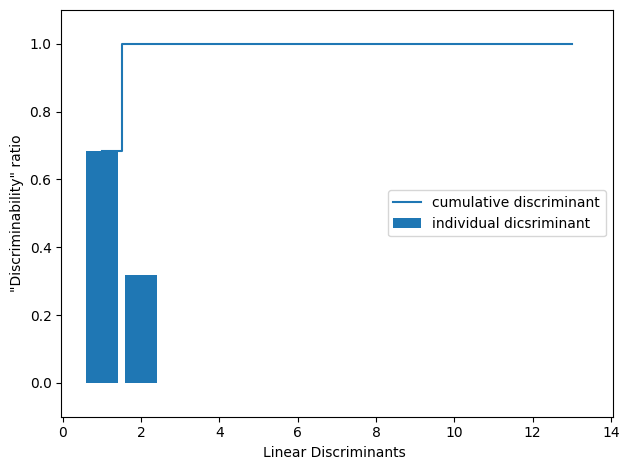

In [30]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, align='center', label='individual dicsriminant')
plt.step(range(1,14), cum_discr, where='mid', label='cumulative discriminant')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants ')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [32]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
                eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1404 -0.4202]
 [ 0.0602 -0.1217]
 [ 0.006  -0.3427]
 [ 0.2332  0.273 ]
 [-0.012  -0.0278]
 [ 0.1879 -0.0886]
 [-0.7472  0.4535]
 [-0.0916  0.1452]
 [ 0.014   0.0678]
 [ 0.286  -0.2229]
 [-0.1073  0.2107]
 [-0.3536 -0.0019]
 [-0.3188 -0.5316]]


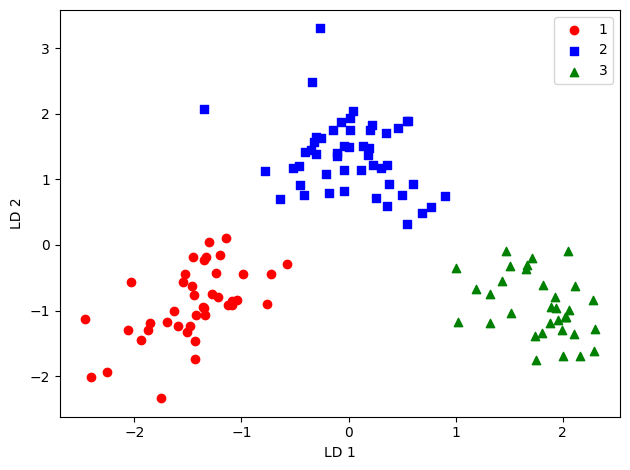

In [33]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0], X_train_lda[y_train == l, 1], c=c, label=l, marker=m)
plt.xlabel("LD 1")
plt.ylabel("LD 2")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

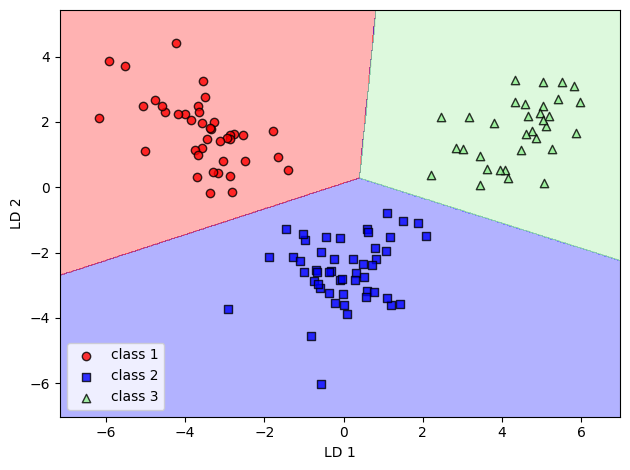

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

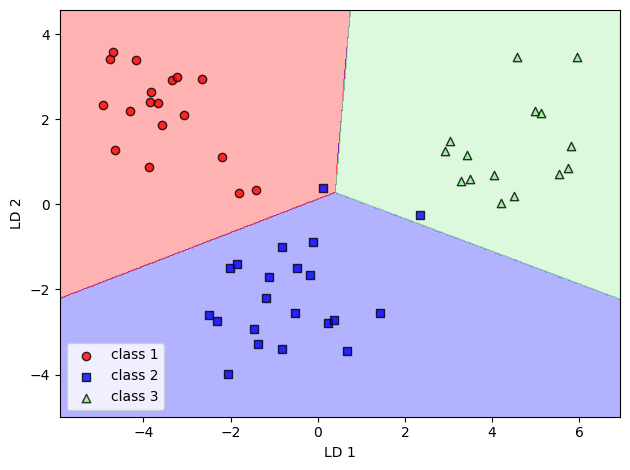

In [38]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

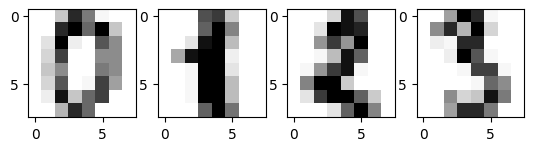

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, ax = plt.subplots(1,4)
for i in range(4):
  ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

In [41]:
y_digits = digits.target
X_digits = digits.data

In [42]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

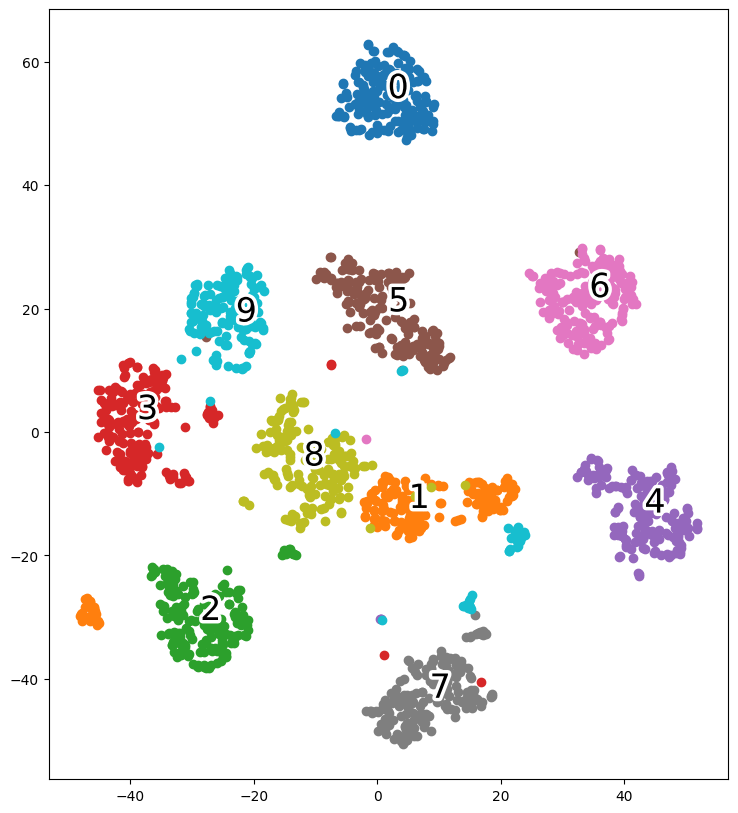

In [50]:
import matplotlib.patheffects as PathEffects
def plot_projections(x, colors):
  f = plt.figure(figsize=(10,10))
  ax = plt.subplot(aspect='equal')
  for i in range(10):
    plt.scatter(x[colors == i, 0], x[colors == i, 1])

  for i in range(10):
    xtext, ytext = np.median(x[colors == i, :], axis = 0)
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground="w"), PathEffects.Normal()])


plot_projections(X_digits_tsne, y_digits)
plt.show()